In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('bankcomplaints.xlsx')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [4]:
df.rename(columns={'Unnamed: 0':'Complaint_No'},inplace=True)
df.head()

,Complaint_No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


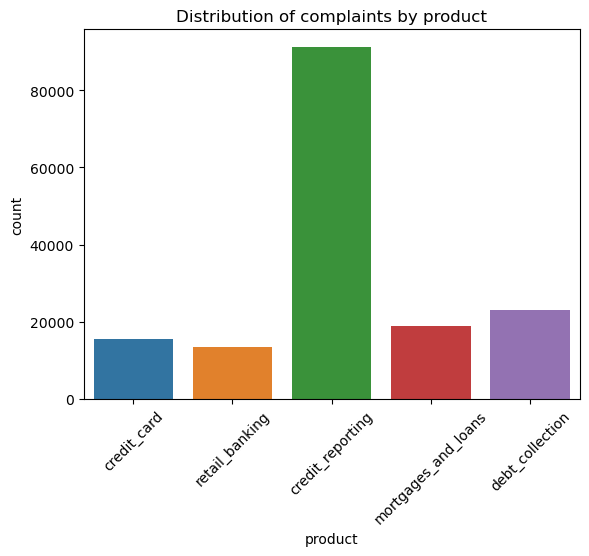

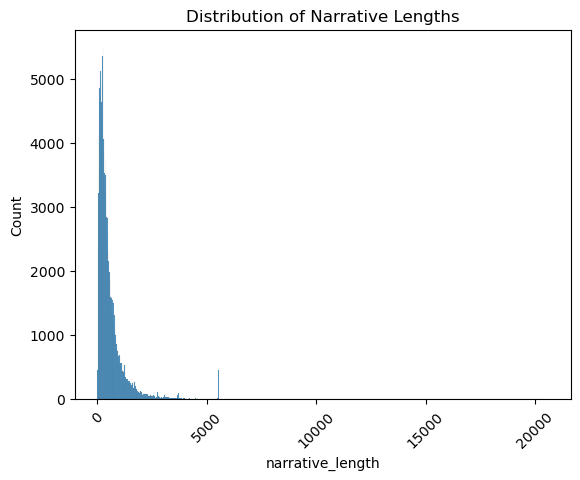

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'product',data = df)
plt.title('Distribution of complaints by product')
plt.xticks(rotation = 45)
plt.show()

df['narrative_length']=df['narrative'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
sns.histplot(df['narrative_length'])
plt.title('Distribution of Narrative Lengths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [6]:
df_encoded = pd.get_dummies(df['product'])
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Complaint_No,product,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,credit_card,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,credit_card,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,credit_reporting,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,credit_reporting,payment history missing credit report made mis...,851,False,True,False,False,False


In [7]:
df = df.drop('product',axis = 1)

In [8]:
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Complaint_No         162421 non-null  int64 
 1   narrative            162411 non-null  object
 2   narrative_length     162421 non-null  int64 
 3   credit_card          162421 non-null  bool  
 4   credit_reporting     162421 non-null  bool  
 5   debt_collection      162421 non-null  bool  
 6   mortgages_and_loans  162421 non-null  bool  
 7   retail_banking       162421 non-null  bool  
dtypes: bool(5), int64(2), object(1)
memory usage: 4.5+ MB


In [10]:
df.isnull().sum()

Complaint_No            0
narrative              10
narrative_length        0
credit_card             0
credit_reporting        0
debt_collection         0
mortgages_and_loans     0
retail_banking          0
dtype: int64

In [11]:
df = df.dropna()
df.isnull().sum()

Complaint_No           0
narrative              0
narrative_length       0
credit_card            0
credit_reporting       0
debt_collection        0
mortgages_and_loans    0
retail_banking         0
dtype: int64

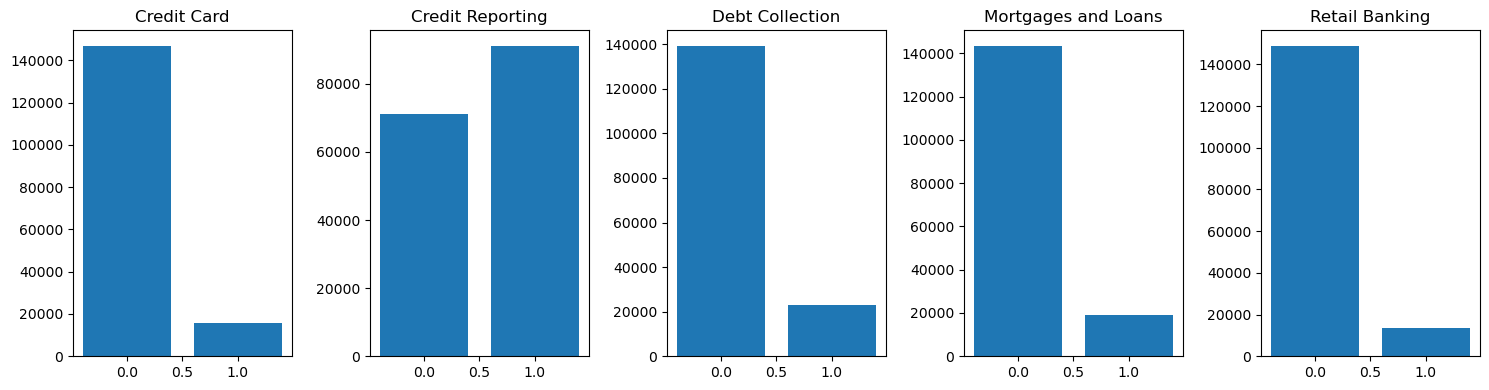

In [12]:
import matplotlib.pyplot as plt
# Count occurrences of each value in each column
counts_credit_card = df["credit_card"].value_counts()
counts_credit_reporting = df["credit_reporting"].value_counts()
counts_debt_collection = df["debt_collection"].value_counts()
counts_mortgages_and_loans = df["mortgages_and_loans"].value_counts()
counts_retail_banking = df["retail_banking"].value_counts()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

# Plot for 'credit_card' column
axes[0].bar(counts_credit_card.index, counts_credit_card.values)
axes[0].set_title('Credit Card')

# Plot for 'credit_reporting' column
axes[1].bar(counts_credit_reporting.index, counts_credit_reporting.values)
axes[1].set_title('Credit Reporting')

# Plot for 'debt_collection' column
axes[2].bar(counts_debt_collection.index, counts_debt_collection.values)
axes[2].set_title('Debt Collection')

# Plot for 'mortgages_and_loans' column
axes[3].bar(counts_mortgages_and_loans.index, counts_mortgages_and_loans.values)
axes[3].set_title('Mortgages and Loans')

# Plot for 'retail_banking' column
axes[4].bar(counts_retail_banking.index, counts_retail_banking.values)
axes[4].set_title('Retail Banking')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

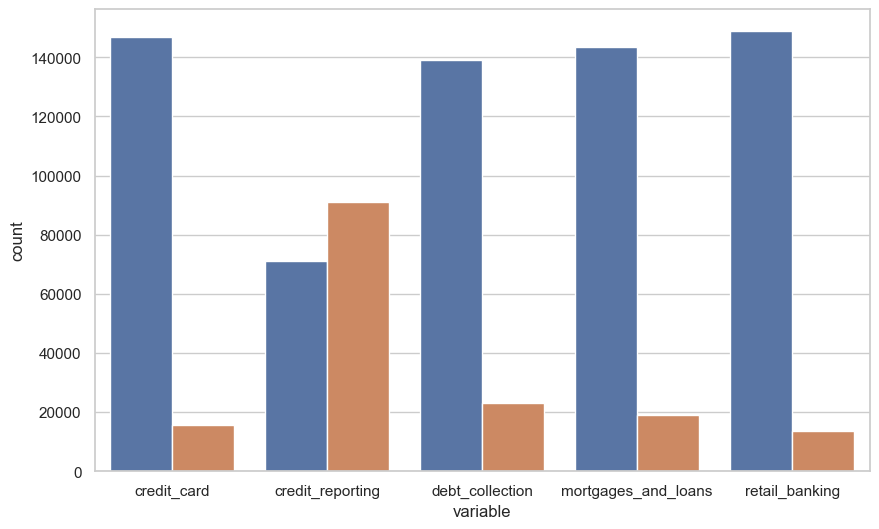

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = pd.melt(df, value_vars=["credit_card", "credit_reporting", "debt_collection", "mortgages_and_loans", "retail_banking"])

# Convert the melted values to "True" and "False"
df_melted["value"] = df_melted["value"].astype(bool)

# Create a countplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="variable", hue="value", data=df_melted)

# Add labels and title
ax.set(xlabel="Categories", ylabel="Count", title="Count of True and False for Each Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [14]:
df["narrative"]=df["narrative"].str.lower()
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True
3,3,payment history missing credit report speciali...,903,False,True,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False


In [15]:
from bs4 import BeautifulSoup

## check if there is html tags

def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags'] = df['narrative'].apply(has_html_tags)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


In [16]:
!pip install emoji

In [17]:
!pip install regex

In [18]:
import regex
import pandas as pd

# Function to check if a string contains emojis using a Unicode character property
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['narrative'].apply(has_emoji)

has_emojis

0         False
1         False
2         False
3         False
4         False
          ...  
162416    False
162417    False
162418    False
162419    False
162420    False
Name: narrative, Length: 162411, dtype: bool

In [19]:
has_emojis.sum()

0

In [20]:
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["narrative"]=df["narrative"].apply(remove_url)

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
punc=string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["narrative"]=df["narrative"].apply(remove_punc)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


In [23]:
from nltk.corpus import stopwords

In [24]:
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["narrative"]=df["narrative"].apply(lambda x: remove_stopwords(x))

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False


In [26]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# Function to apply sentence and word tokenization
def tokenize_text(text):
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words

df['Complaint_tokenized_text'] = df['narrative'].apply(tokenize_text)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags,Complaint_tokenized_text
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,False,"[[purchase, order, day, shipping, amount, rece..."
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,False,"[[forwarded, message, date, tue, subject, plea..."
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,False,"[[forwarded, message, cc, sent, friday, pdt, s..."
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False,"[[payment, history, missing, credit, report, s..."
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False,"[[payment, history, missing, credit, report, m..."


In [38]:
df.columns[3:7]

Index(['credit_card', 'credit_reporting', 'debt_collection',
       'mortgages_and_loans'],
      dtype='object')

In [27]:
from fuzzywuzzy import fuzz, process

# Define the fuzzy classification function
def fuzzy_classification(narrative, categories):
    if isinstance(narrative, str):  
        best_match, score = process.extractOne(narrative, categories, scorer=fuzz.token_set_ratio)
        return best_match, score
    else:
        return None, 0  

# List of unique categories to match against
categories = df.columns[3:7]  # Assuming columns from 'credit_card' to 'retail_banking'

# Apply fuzzy classification on the narrative column
df['fuzzy_product'], df['similarity_score'] = zip(*df['narrative'].apply(lambda x: fuzzy_classification(x, categories)))

# Categorize complaints based on similarity score
def categorize_complaint(score):
    if score <= 2:
        return "Worst"
    elif score > 2 and score <= 4:
        return "Bad"
    elif score > 4 and score <= 6:
        return "Normal"
    elif score > 6 and score <= 8:
        return "Good"
    else:
        return "Excellent"

df['complaint_category'] = df['similarity_score'].apply(categorize_complaint)

# View the results
df[['narrative', 'fuzzy_product', 'similarity_score', 'complaint_category']].head()


,narrative,fuzzy_product,similarity_score,complaint_category
0,purchase order day shipping amount receive pro...,credit_card,2,Worst
1,forwarded message date tue subject please inve...,credit_reporting,4,Bad
2,forwarded message cc sent friday pdt subject f...,credit_reporting,4,Bad
3,payment history missing credit report speciali...,credit_reporting,6,Normal
4,payment history missing credit report made mis...,credit_reporting,6,Normal


In [28]:
# Save the DataFrame with fuzzy classification results to a CSV file
df.to_csv('fuzzied_data1.csv', index=False)


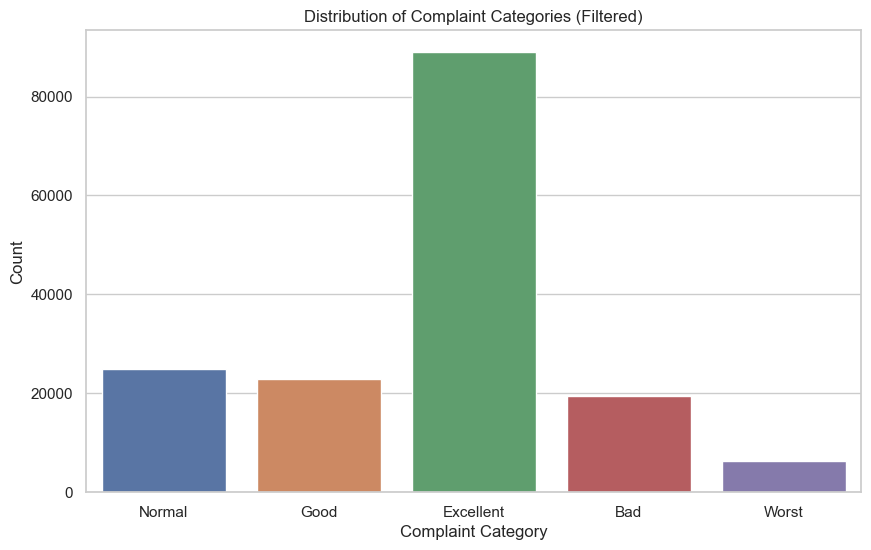

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='complaint_category', order=['Normal', 'Good', 'Excellent','Bad','Worst'])
plt.title("Distribution of Complaint Categories (Filtered)")
plt.xlabel("Complaint Category")
plt.ylabel("Count")
plt.show()

In [30]:
filtered_df = df[~df['complaint_category'].isin(['Worst', 'Bad'])]

In [31]:
filtered_df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags,Complaint_tokenized_text,fuzzy_product,similarity_score,complaint_category
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,False,"[[payment, history, missing, credit, report, s...",credit_reporting,6,Normal
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,False,"[[payment, history, missing, credit, report, m...",credit_reporting,6,Normal
5,5,payment history missing credit report made mis...,849,False,True,False,False,False,False,"[[payment, history, missing, credit, report, m...",credit_reporting,6,Normal
11,11,called request new york state covid relief pla...,173,True,False,False,False,False,False,"[[called, request, new, york, state, covid, re...",debt_collection,12,Excellent
12,12,capital one secured credit account opened name...,130,True,False,False,False,False,False,"[[capital, one, secured, credit, account, open...",credit_reporting,18,Excellent


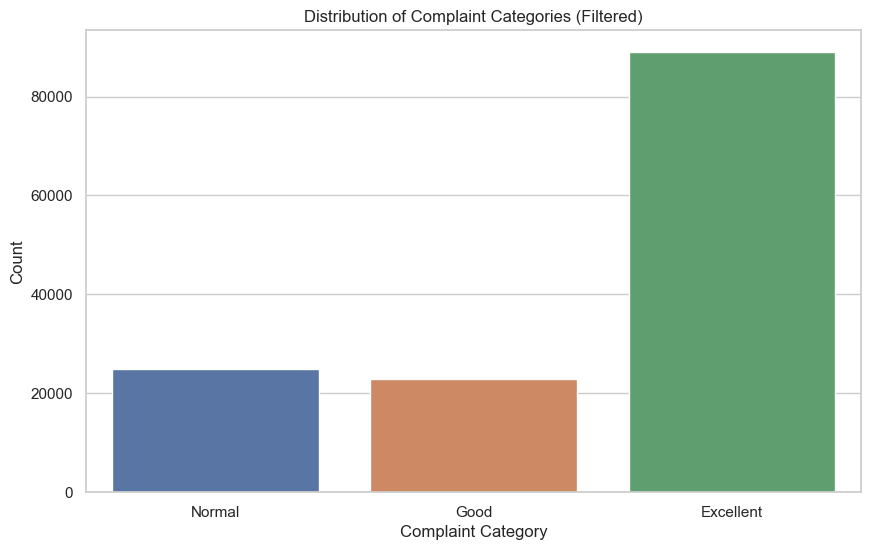

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='complaint_category', order=['Normal', 'Good', 'Excellent'])
plt.title("Distribution of Complaint Categories (Filtered)")
plt.xlabel("Complaint Category")
plt.ylabel("Count")
plt.show()

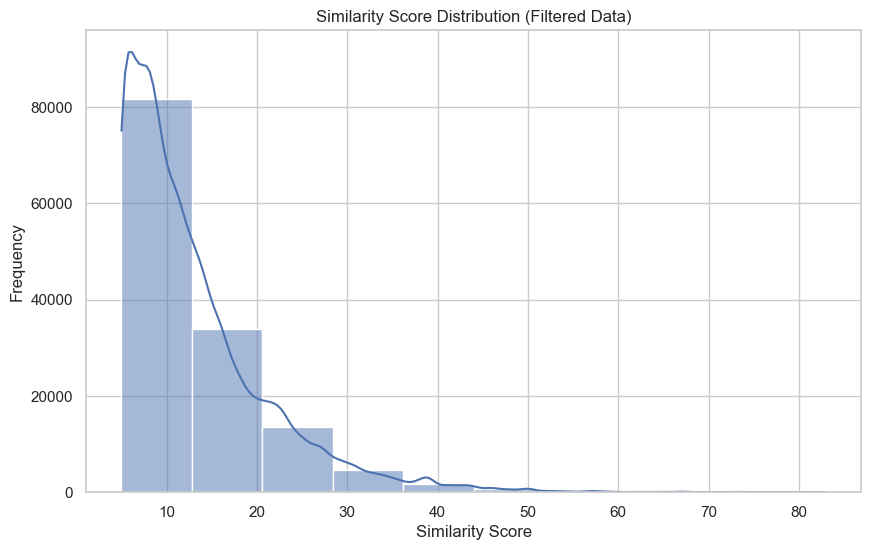

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['similarity_score'], bins=10, kde=True)
plt.title("Similarity Score Distribution (Filtered Data)")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

Model Accuracy: 63.42%

Classification Report:
              precision    recall  f1-score   support

         Bad       0.39      0.59      0.47      3884
   Excellent       0.79      0.86      0.83     17796
        Good       0.65      0.15      0.24      4569
      Normal       0.34      0.39      0.36      4968
       Worst       0.72      0.28      0.40      1266

    accuracy                           0.63     32483
   macro avg       0.58      0.45      0.46     32483
weighted avg       0.65      0.63      0.61     32483



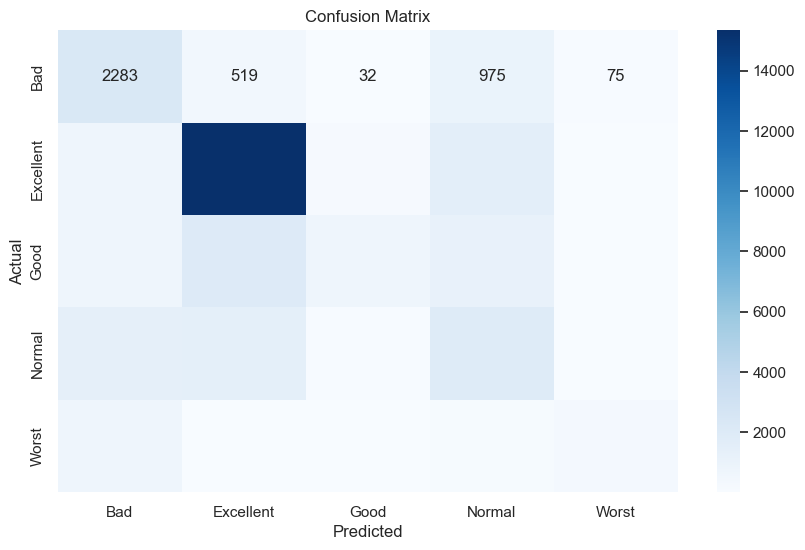

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare Data for Training
X = df['narrative']  # Features: Complaint narratives
y = df['complaint_category'] # Target: Fuzzy classified product categories

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')  # Experiment with max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 5: Transform Test Data and Evaluate Model
X_test_tfidf = vectorizer.transform(X_test)  # Ensure the test data is vectorized
y_pred = model.predict(X_test_tfidf)        # Predict using the transformed test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Model Accuracy: 72.65%

Classification Report:
              precision    recall  f1-score   support

         Bad       0.54      0.57      0.56      3884
   Excellent       0.96      0.86      0.91     17796
        Good       0.45      0.54      0.49      4569
      Normal       0.48      0.51      0.49      4968
       Worst       0.66      0.80      0.72      1266

    accuracy                           0.73     32483
   macro avg       0.62      0.66      0.63     32483
weighted avg       0.75      0.73      0.74     32483



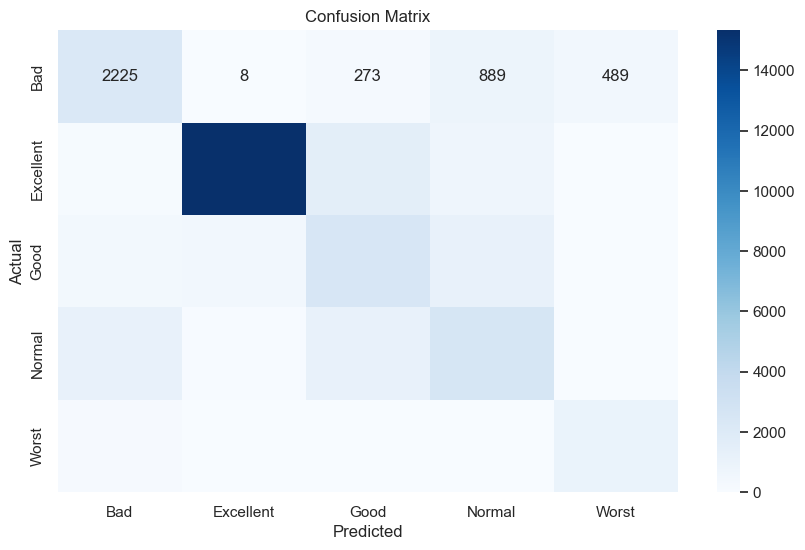

The complaint is classified as: Excellent


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Prepare Data for Training
X = df['narrative']  # Features: Complaint narratives
y = df['complaint_category']  # Target: Fuzzy classified product categories

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')  # Experiment with max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)



# Step 4: Train Logistic Regression Model
logistic_model = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='ovr', random_state=42, class_weight='balanced')
logistic_model.fit(X_train_tfidf, y_train)

# Step 5: Predict and Evaluate Model
y_pred = logistic_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Test a Single Narrative
test_narrative = "I am facing issues with my credit card bill not being updated."
processed_test_narrative = test_narrative.lower()  # Optional: Apply preprocessing if implemented earlier
test_vectorized = vectorizer.transform([processed_test_narrative])
predicted_category = logistic_model.predict(test_vectorized)
print(f"The complaint is classified as: {predicted_category[0]}")


Model Accuracy: 79.46%

Classification Report:
              precision    recall  f1-score   support

         Bad       0.73      0.72      0.73      3884
   Excellent       0.98      0.87      0.92     17796
        Good       0.51      0.74      0.60      4569
      Normal       0.66      0.64      0.65      4968
       Worst       0.74      0.83      0.78      1266

    accuracy                           0.79     32483
   macro avg       0.72      0.76      0.74     32483
weighted avg       0.82      0.79      0.80     32483



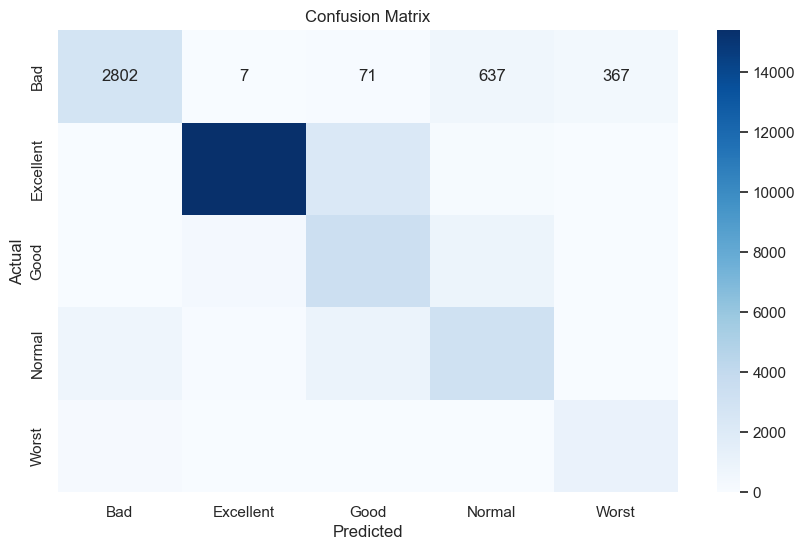

The complaint is classified as: Excellent


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare Data for Training
X = df['narrative']  # Features: Complaint narratives
y = df['complaint_category']  # Target: Fuzzy classified product categories

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')  # Experiment with max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42, class_weight='balanced')  # Linear kernel for text data
svm_model.fit(X_train_tfidf, y_train)

# Step 5: Predict and Evaluate Model
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Test a Single Narrative
test_narrative = "I am facing issues with my credit card bill not being updated."
processed_test_narrative = test_narrative.lower()  # Optional: Apply preprocessing if implemented earlier
test_vectorized = vectorizer.transform([processed_test_narrative])
predicted_category = svm_model.predict(test_vectorized)
print(f"The complaint is classified as: {predicted_category[0]}")


In [40]:
# Input a new complaint
new_complaint = input("Enter the complaint narrative: ")

# Preprocess and vectorize the input (similar to training/test data)
new_complaint_tfidf = vectorizer.transform([new_complaint])

# Predict the category
predicted_category = model.predict(new_complaint_tfidf)

# Display the result
print(f"The complaint is classified as: {predicted_category[0]}")


Enter the complaint narrative:  I am happy with my credit card bill.


The complaint is classified as: Excellent
